# Web scraping menggunakan pandas 

Data dibawah adalah data "2018 - 2019 NBA Player stats:per game" yang berasal dari  http://www.basketball-reference.com/.

In [2]:
import pandas as pd

# mengambil tabel data HTML
url = 'https://www.basketball-reference.com/leagues/NBA_2019_per_game.html'
html = pd.read_html(url, header = 0)
df2019 = html[0]

# Data Cleaning
raw = df2019.drop(df2019[df2019.Age == 'Age'].index)
raw

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1,Álex Abrines,SG,25,OKC,31,2,19.0,1.8,5.1,...,.923,0.2,1.4,1.5,0.6,0.5,0.2,0.5,1.7,5.3
1,2,Quincy Acy,PF,28,PHO,10,0,12.3,0.4,1.8,...,.700,0.3,2.2,2.5,0.8,0.1,0.4,0.4,2.4,1.7
2,3,Jaylen Adams,PG,22,ATL,34,1,12.6,1.1,3.2,...,.778,0.3,1.4,1.8,1.9,0.4,0.1,0.8,1.3,3.2
3,4,Steven Adams,C,25,OKC,80,80,33.4,6.0,10.1,...,.500,4.9,4.6,9.5,1.6,1.5,1.0,1.7,2.6,13.9
4,5,Bam Adebayo,C,21,MIA,82,28,23.3,3.4,5.9,...,.735,2.0,5.3,7.3,2.2,0.9,0.8,1.5,2.5,8.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
729,528,Tyler Zeller,C,29,MEM,4,1,20.5,4.0,7.0,...,.778,2.3,2.3,4.5,0.8,0.3,0.8,1.0,4.0,11.5
730,529,Ante Žižić,C,22,CLE,59,25,18.3,3.1,5.6,...,.705,1.8,3.6,5.4,0.9,0.2,0.4,1.0,1.9,7.8
731,530,Ivica Zubac,C,21,TOT,59,37,17.6,3.6,6.4,...,.802,1.9,4.2,6.1,1.1,0.2,0.9,1.2,2.3,8.9
732,530,Ivica Zubac,C,21,LAL,33,12,15.6,3.4,5.8,...,.864,1.6,3.3,4.9,0.8,0.1,0.8,1.0,2.2,8.5


# Data Cleaning

## Data Dimension

In [4]:
raw.shape

(708, 30)

## Dataframe contents

In [5]:
raw.head()

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1,Álex Abrines,SG,25,OKC,31,2,19.0,1.8,5.1,...,.923,0.2,1.4,1.5,0.6,0.5,0.2,0.5,1.7,5.3
1,2,Quincy Acy,PF,28,PHO,10,0,12.3,0.4,1.8,...,.700,0.3,2.2,2.5,0.8,0.1,0.4,0.4,2.4,1.7
2,3,Jaylen Adams,PG,22,ATL,34,1,12.6,1.1,3.2,...,.778,0.3,1.4,1.8,1.9,0.4,0.1,0.8,1.3,3.2
3,4,Steven Adams,C,25,OKC,80,80,33.4,6.0,10.1,...,.500,4.9,4.6,9.5,1.6,1.5,1.0,1.7,2.6,13.9
4,5,Bam Adebayo,C,21,MIA,82,28,23.3,3.4,5.9,...,.735,2.0,5.3,7.3,2.2,0.9,0.8,1.5,2.5,8.9


## Check for missing values

In [6]:
raw.isnull().sum()

Rk         0
Player     0
Pos        0
Age        0
Tm         0
G          0
GS         0
MP         0
FG         0
FGA        0
FG%        6
3P         0
3PA        0
3P%       47
2P         0
2PA        0
2P%       15
eFG%       6
FT         0
FTA        0
FT%       43
ORB        0
DRB        0
TRB        0
AST        0
STL        0
BLK        0
TOV        0
PF         0
PTS        0
dtype: int64

## Replace missing values with 0

In [7]:
df = raw.fillna(0)

In [8]:
df.isnull().sum()

Rk        0
Player    0
Pos       0
Age       0
Tm        0
G         0
GS        0
MP        0
FG        0
FGA       0
FG%       0
3P        0
3PA       0
3P%       0
2P        0
2PA       0
2P%       0
eFG%      0
FT        0
FTA       0
FT%       0
ORB       0
DRB       0
TRB       0
AST       0
STL       0
BLK       0
TOV       0
PF        0
PTS       0
dtype: int64

In [17]:
df = df.drop(['Rk'], axis=1)
df

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,Álex Abrines,SG,25,OKC,31,2,19.0,1.8,5.1,0.357,...,0.923,0.2,1.4,1.5,0.6,0.5,0.2,0.5,1.7,5.3
1,Quincy Acy,PF,28,PHO,10,0,12.3,0.4,1.8,0.222,...,0.700,0.3,2.2,2.5,0.8,0.1,0.4,0.4,2.4,1.7
2,Jaylen Adams,PG,22,ATL,34,1,12.6,1.1,3.2,0.345,...,0.778,0.3,1.4,1.8,1.9,0.4,0.1,0.8,1.3,3.2
3,Steven Adams,C,25,OKC,80,80,33.4,6.0,10.1,0.595,...,0.500,4.9,4.6,9.5,1.6,1.5,1.0,1.7,2.6,13.9
4,Bam Adebayo,C,21,MIA,82,28,23.3,3.4,5.9,0.576,...,0.735,2.0,5.3,7.3,2.2,0.9,0.8,1.5,2.5,8.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
703,Tyler Zeller,C,29,MEM,4,1,20.5,4.0,7.0,0.571,...,0.778,2.3,2.3,4.5,0.8,0.3,0.8,1.0,4.0,11.5
704,Ante Žižić,C,22,CLE,59,25,18.3,3.1,5.6,0.553,...,0.705,1.8,3.6,5.4,0.9,0.2,0.4,1.0,1.9,7.8
705,Ivica Zubac,C,21,TOT,59,37,17.6,3.6,6.4,0.559,...,0.802,1.9,4.2,6.1,1.1,0.2,0.9,1.2,2.3,8.9
706,Ivica Zubac,C,21,LAL,33,12,15.6,3.4,5.8,0.580,...,0.864,1.6,3.3,4.9,0.8,0.1,0.8,1.0,2.2,8.5


## Write to csv file

In [18]:
df.to_csv('NBA2018-2019.csv', index=False)

In [19]:
ls

 Volume in drive C has no label.
 Volume Serial Number is 8641-11C2

 Directory of C:\Users\SmartWin10\Downloads

08/02/2020  05:32 PM    <DIR>          .
08/02/2020  05:32 PM    <DIR>          ..
08/02/2020  05:13 PM    <DIR>          .ipynb_checkpoints
07/29/2020  03:49 PM    <DIR>          BONUS-MATERI-SDM
07/29/2020  05:40 PM    <DIR>          CSV-20200729T103932Z-001
07/29/2020  05:22 PM    <DIR>          file setup
07/27/2020  08:29 PM    <DIR>          IBM Data Science
08/01/2020  11:05 AM         3,620,934 InsideSherpa+-+What+happens+after+you+complete+a+program_.pdf
07/29/2020  09:22 PM           224,579 Lecture_04_create_Queries.pdf
07/29/2020  09:42 PM           183,480 Lecture_07_SELECT+&+DISTINCT.pdf
07/29/2020  09:51 PM           179,824 Lecture_08_WHERE.pdf
08/02/2020  05:32 PM            60,784 NBA Data Analytics.ipynb
08/02/2020  05:32 PM           104,557 NBA2018-2019.csv
08/02/2020  04:30 PM            91,017 nba2019.csv
08/02/2020  05:07 PM         4,663,339 pandas_

# Exploratory Data Analysis

## Read Data 

In [20]:
df = pd.read_csv('NBA2018-2019.csv')
df

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,Álex Abrines,SG,25,OKC,31,2,19.0,1.8,5.1,0.357,...,0.923,0.2,1.4,1.5,0.6,0.5,0.2,0.5,1.7,5.3
1,Quincy Acy,PF,28,PHO,10,0,12.3,0.4,1.8,0.222,...,0.700,0.3,2.2,2.5,0.8,0.1,0.4,0.4,2.4,1.7
2,Jaylen Adams,PG,22,ATL,34,1,12.6,1.1,3.2,0.345,...,0.778,0.3,1.4,1.8,1.9,0.4,0.1,0.8,1.3,3.2
3,Steven Adams,C,25,OKC,80,80,33.4,6.0,10.1,0.595,...,0.500,4.9,4.6,9.5,1.6,1.5,1.0,1.7,2.6,13.9
4,Bam Adebayo,C,21,MIA,82,28,23.3,3.4,5.9,0.576,...,0.735,2.0,5.3,7.3,2.2,0.9,0.8,1.5,2.5,8.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
703,Tyler Zeller,C,29,MEM,4,1,20.5,4.0,7.0,0.571,...,0.778,2.3,2.3,4.5,0.8,0.3,0.8,1.0,4.0,11.5
704,Ante Žižić,C,22,CLE,59,25,18.3,3.1,5.6,0.553,...,0.705,1.8,3.6,5.4,0.9,0.2,0.4,1.0,1.9,7.8
705,Ivica Zubac,C,21,TOT,59,37,17.6,3.6,6.4,0.559,...,0.802,1.9,4.2,6.1,1.1,0.2,0.9,1.2,2.3,8.9
706,Ivica Zubac,C,21,LAL,33,12,15.6,3.4,5.8,0.580,...,0.864,1.6,3.3,4.9,0.8,0.1,0.8,1.0,2.2,8.5


In [21]:
df.dtypes

Player     object
Pos        object
Age         int64
Tm         object
G           int64
GS          int64
MP        float64
FG        float64
FGA       float64
FG%       float64
3P        float64
3PA       float64
3P%       float64
2P        float64
2PA       float64
2P%       float64
eFG%      float64
FT        float64
FTA       float64
FT%       float64
ORB       float64
DRB       float64
TRB       float64
AST       float64
STL       float64
BLK       float64
TOV       float64
PF        float64
PTS       float64
dtype: object

In [22]:
df.select_dtypes(include=['number'])

,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,25,31,2,19.0,1.8,5.1,0.357,1.3,4.1,0.323,...,0.923,0.2,1.4,1.5,0.6,0.5,0.2,0.5,1.7,5.3
1,28,10,0,12.3,0.4,1.8,0.222,0.2,1.5,0.133,...,0.700,0.3,2.2,2.5,0.8,0.1,0.4,0.4,2.4,1.7
2,22,34,1,12.6,1.1,3.2,0.345,0.7,2.2,0.338,...,0.778,0.3,1.4,1.8,1.9,0.4,0.1,0.8,1.3,3.2
3,25,80,80,33.4,6.0,10.1,0.595,0.0,0.0,0.000,...,0.500,4.9,4.6,9.5,1.6,1.5,1.0,1.7,2.6,13.9
4,21,82,28,23.3,3.4,5.9,0.576,0.0,0.2,0.200,...,0.735,2.0,5.3,7.3,2.2,0.9,0.8,1.5,2.5,8.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
703,29,4,1,20.5,4.0,7.0,0.571,0.0,0.0,0.000,...,0.778,2.3,2.3,4.5,0.8,0.3,0.8,1.0,4.0,11.5
704,22,59,25,18.3,3.1,5.6,0.553,0.0,0.0,0.000,...,0.705,1.8,3.6,5.4,0.9,0.2,0.4,1.0,1.9,7.8
705,21,59,37,17.6,3.6,6.4,0.559,0.0,0.0,0.000,...,0.802,1.9,4.2,6.1,1.1,0.2,0.9,1.2,2.3,8.9
706,21,33,12,15.6,3.4,5.8,0.580,0.0,0.0,0.000,...,0.864,1.6,3.3,4.9,0.8,0.1,0.8,1.0,2.2,8.5


In [23]:
df.select_dtypes(include=['object'])

,Player,Pos,Tm
0,Álex Abrines,SG,OKC
1,Quincy Acy,PF,PHO
2,Jaylen Adams,PG,ATL
3,Steven Adams,C,OKC
4,Bam Adebayo,C,MIA
...,...,...,...
703,Tyler Zeller,C,MEM
704,Ante Žižić,C,CLE
705,Ivica Zubac,C,TOT
706,Ivica Zubac,C,LAL


# QUESTIONS

## Conditional Selection

Di dalam menampilkan eksploratori data analisis, penting untuk bisa memilih subsets dari datauntuk menampilkan analisis atau perbandingan

Siapa pemain yang mencetak skor Point (PTS) Per Game tertinggi?

In [25]:
df.PTS.max()

36.1

In [26]:
df[df.PTS == df.PTS.max()]

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
267,James Harden,PG,29,HOU,78,78,36.8,10.8,24.5,0.442,...,0.879,0.8,5.8,6.6,7.5,2.0,0.7,5.0,3.1,36.1


Dari tim manakah pemain tersebut?

In [28]:
PlayerMaxPoints = df[df.PTS == df.PTS.max()]
PlayerMaxPoints.Tm

267    HOU
Name: Tm, dtype: object

Posisi pemain tersebut?

In [29]:
PlayerMaxPoints.Pos

267    PG
Name: Pos, dtype: object

Berapa pertandingan yang dimainkannya dalam musim ini?

In [30]:
PlayerMaxPoints.G

267    78
Name: G, dtype: int64

Pemain mana saja yang mencetak skor lebih dari 20 Point (Points) Per Game?

In [31]:
df[df.PTS > 20]

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
7,LaMarcus Aldridge,C,33,SAS,81,81,33.2,8.4,16.3,0.519,...,0.847,3.1,6.1,9.2,2.4,0.5,1.3,1.8,2.2,21.3
19,Giannis Antetokounmpo,PF,24,MIL,72,72,32.8,10.0,17.3,0.578,...,0.729,2.2,10.3,12.5,5.9,1.3,1.5,3.7,3.2,27.7
47,Bradley Beal,SG,25,WAS,82,82,36.9,9.3,19.6,0.475,...,0.808,1.1,3.9,5.0,5.5,1.5,0.7,2.7,2.8,25.6
68,Devin Booker,SG,22,PHO,64,64,35.0,9.2,19.6,0.467,...,0.866,0.6,3.5,4.1,6.8,0.9,0.2,4.1,3.1,26.6
103,Jimmy Butler,SG,29,MIN,10,10,36.1,7.4,15.7,0.471,...,0.787,1.6,3.6,5.2,4.3,2.4,1.0,1.4,1.8,21.3
143,Mike Conley,PG,31,MEM,70,70,33.5,7.0,16.0,0.438,...,0.845,0.6,2.8,3.4,6.4,1.3,0.3,1.9,1.8,21.1
159,Stephen Curry,PG,30,GSW,69,69,33.8,9.2,19.4,0.472,...,0.916,0.7,4.7,5.3,5.2,1.3,0.4,2.8,2.4,27.3
161,Anthony Davis,C,25,NOP,56,56,33.0,9.5,18.3,0.517,...,0.794,3.1,8.9,12.0,3.9,1.6,2.4,2.0,2.4,25.9
174,DeMar DeRozan,SG,29,SAS,77,77,34.9,8.2,17.1,0.481,...,0.830,0.7,5.3,6.0,6.2,1.1,0.5,2.6,2.3,21.2
181,Luka Dončić,SG,19,DAL,72,72,32.2,7.0,16.5,0.427,...,0.713,1.2,6.6,7.8,6.0,1.1,0.3,3.4,1.9,21.2


Pemain mana yang memiliki 3 point tertinggi per game (3P)?

In [32]:
df[df['3P'] == df['3P'].max()]

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
159,Stephen Curry,PG,30,GSW,69,69,33.8,9.2,19.4,0.472,...,0.916,0.7,4.7,5.3,5.2,1.3,0.4,2.8,2.4,27.3


Pemain mana yang memiliki assist per game (AST) tertinggi?

In [33]:
df[df['AST'] == df['AST'].max()]

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
675,Russell Westbrook,PG,30,OKC,73,73,36.0,8.6,20.2,0.428,...,0.656,1.5,9.6,11.1,10.7,1.9,0.5,4.5,3.4,22.9


Siapa pemain yang mencetak skor tertinggi (PTS) di Los Angeles Lakers?

In [34]:
LAL = df.groupby('Tm').get_group('LAL')

In [35]:
LAL[LAL.PTS == LAL.PTS.max()]

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
332,LeBron James,SF,34,LAL,55,55,35.2,10.1,19.9,0.51,...,0.665,1.0,7.4,8.5,8.3,1.3,0.6,3.6,1.7,27.4


 Dari 5 posisi, posisi mana yang mencetak skor tertinggi?

In [36]:
df.groupby('Pos').PTS.describe()

,count,mean,std,min,25%,50%,75%,max
Pos,,,,,,,,
C,120.0,8.785000,5.616582,0.0,4.175,7.75,12.350,27.5
C-PF,1.0,5.000000,NaN,5.0,5.000,5.00,5.000,5.0
PF,147.0,7.669388,5.633858,0.0,3.300,6.10,11.100,27.7
PF-C,1.0,3.300000,NaN,3.3,3.300,3.30,3.300,3.3
PF-SF,2.0,11.200000,7.353911,6.0,8.600,11.20,13.800,16.4
PG,138.0,8.659420,6.306243,0.0,4.300,6.95,11.075,36.1
SF,119.0,8.315966,5.940310,0.0,4.250,6.80,11.700,28.0
SF-SG,2.0,15.450000,4.596194,12.2,13.825,15.45,17.075,18.7
SG,176.0,8.484091,5.695149,0.0,4.000,7.65,11.225,26.6


In [39]:
positions = ['C', 'PF', 'SF', 'PG', 'SG']
POS = df[df['Pos'].isin(positions)]
POS

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,Álex Abrines,SG,25,OKC,31,2,19.0,1.8,5.1,0.357,...,0.923,0.2,1.4,1.5,0.6,0.5,0.2,0.5,1.7,5.3
1,Quincy Acy,PF,28,PHO,10,0,12.3,0.4,1.8,0.222,...,0.700,0.3,2.2,2.5,0.8,0.1,0.4,0.4,2.4,1.7
2,Jaylen Adams,PG,22,ATL,34,1,12.6,1.1,3.2,0.345,...,0.778,0.3,1.4,1.8,1.9,0.4,0.1,0.8,1.3,3.2
3,Steven Adams,C,25,OKC,80,80,33.4,6.0,10.1,0.595,...,0.500,4.9,4.6,9.5,1.6,1.5,1.0,1.7,2.6,13.9
4,Bam Adebayo,C,21,MIA,82,28,23.3,3.4,5.9,0.576,...,0.735,2.0,5.3,7.3,2.2,0.9,0.8,1.5,2.5,8.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
703,Tyler Zeller,C,29,MEM,4,1,20.5,4.0,7.0,0.571,...,0.778,2.3,2.3,4.5,0.8,0.3,0.8,1.0,4.0,11.5
704,Ante Žižić,C,22,CLE,59,25,18.3,3.1,5.6,0.553,...,0.705,1.8,3.6,5.4,0.9,0.2,0.4,1.0,1.9,7.8
705,Ivica Zubac,C,21,TOT,59,37,17.6,3.6,6.4,0.559,...,0.802,1.9,4.2,6.1,1.1,0.2,0.9,1.2,2.3,8.9
706,Ivica Zubac,C,21,LAL,33,12,15.6,3.4,5.8,0.580,...,0.864,1.6,3.3,4.9,0.8,0.1,0.8,1.0,2.2,8.5


In [40]:
POS.groupby('Pos').PTS.describe()

,count,mean,std,min,25%,50%,75%,max
Pos,,,,,,,,
C,120.0,8.785000,5.616582,0.0,4.175,7.75,12.350,27.5
PF,147.0,7.669388,5.633858,0.0,3.300,6.10,11.100,27.7
PG,138.0,8.659420,6.306243,0.0,4.300,6.95,11.075,36.1
SF,119.0,8.315966,5.940310,0.0,4.250,6.80,11.700,28.0
SG,176.0,8.484091,5.695149,0.0,4.000,7.65,11.225,26.6


## Histograms

In [41]:
PTS = df[['Pos', 'PTS']]

positions = ['C', 'PF', 'SF', 'PG', 'SG']
PTS = PTS[PTS['Pos'].isin(positions)]

PTS

,Pos,PTS
0,SG,5.3
1,PF,1.7
2,PG,3.2
3,C,13.9
4,C,8.9
...,...,...
703,C,11.5
704,C,7.8
705,C,8.9
706,C,8.5


array([[<AxesSubplot:title={'center':'C'}>,
        <AxesSubplot:title={'center':'PF'}>],
       [<AxesSubplot:title={'center':'PG'}>,
        <AxesSubplot:title={'center':'SF'}>],
       [<AxesSubplot:title={'center':'SG'}>, <AxesSubplot:>]],
      dtype=object)

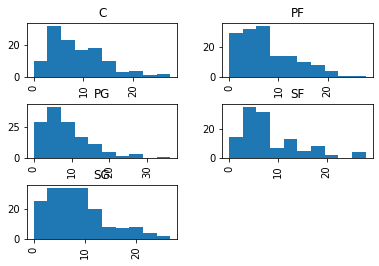

In [42]:
PTS['PTS'].hist(by=PTS['Pos'])

array([<AxesSubplot:title={'center':'C'}>,
       <AxesSubplot:title={'center':'PF'}>,
       <AxesSubplot:title={'center':'PG'}>,
       <AxesSubplot:title={'center':'SF'}>,
       <AxesSubplot:title={'center':'SG'}>], dtype=object)

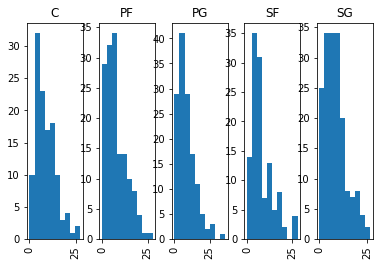

In [44]:
PTS['PTS'].hist(by=PTS['Pos'], layout=(1,5))

array([<AxesSubplot:title={'center':'C'}>,
       <AxesSubplot:title={'center':'PF'}>,
       <AxesSubplot:title={'center':'PG'}>,
       <AxesSubplot:title={'center':'SF'}>,
       <AxesSubplot:title={'center':'SG'}>], dtype=object)

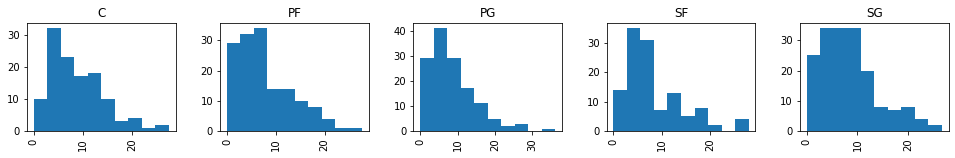

In [47]:
PTS['PTS'].hist(by=PTS['Pos'], layout=(1,5), figsize=(16,2))

### Seaborn data visualization

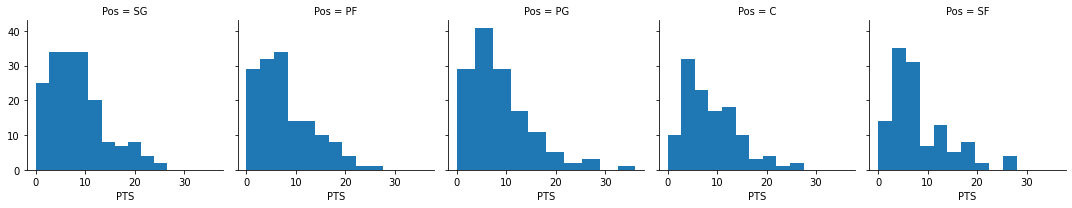

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

g = sns.FacetGrid(PTS, col="Pos")
g.map(plt.hist, "PTS");

## Box Plots

<AxesSubplot:title={'center':'PTS'}, xlabel='Pos'>

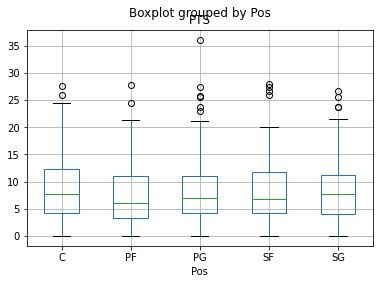

In [50]:
PTS.boxplot(column='PTS', by='Pos')

<AxesSubplot:xlabel='Pos', ylabel='PTS'>

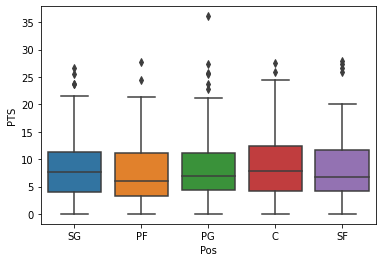

In [51]:
sns.boxplot(x = 'Pos', y = 'PTS', data = PTS)

<AxesSubplot:xlabel='Pos', ylabel='PTS'>

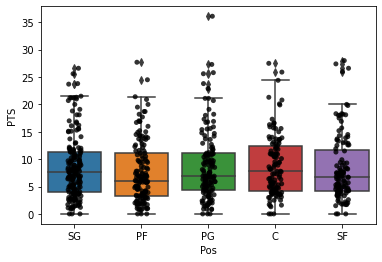

In [52]:
sns.boxplot(x = 'Pos', y = 'PTS', data = PTS)
sns.stripplot(x = 'Pos', y = 'PTS', data = PTS,
             jitter=True,
             marker='o',
             alpha=0.8,
             color="black")

## Heatmap

In [53]:
corr = df.corr()
corr

,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
Age,1.000000,0.067822,0.040582,0.146543,0.058213,0.073779,0.036927,0.166271,0.159218,0.080328,...,0.171646,-0.016292,0.103831,0.072544,0.141556,0.080757,0.012428,0.063740,0.108226,0.081915
G,0.067822,1.000000,0.641484,0.617229,0.541442,0.521988,0.297932,0.396163,0.376494,0.190439,...,0.419104,0.288914,0.441461,0.421579,0.412688,0.404403,0.338509,0.473385,0.475785,0.534349
GS,0.040582,0.641484,1.000000,0.764661,0.724611,0.711811,0.208333,0.496450,0.485661,0.147906,...,0.267027,0.377497,0.599080,0.567642,0.563876,0.566980,0.424585,0.649941,0.537722,0.720953
MP,0.146543,0.617229,0.764661,1.000000,0.870974,0.892272,0.250899,0.686999,0.693822,0.263535,...,0.454169,0.386490,0.695738,0.642351,0.675725,0.734732,0.438661,0.766357,0.730804,0.875831
FG,0.058213,0.541442,0.724611,0.870974,1.000000,0.973355,0.351566,0.604936,0.600830,0.218206,...,0.371598,0.464378,0.723009,0.687463,0.665761,0.635615,0.460076,0.830099,0.624156,0.990014
FGA,0.073779,0.521988,0.711811,0.892272,0.973355,1.000000,0.209266,0.710099,0.725114,0.254855,...,0.395902,0.331235,0.649522,0.590755,0.703093,0.659276,0.362490,0.832446,0.591815,0.980447
FG%,0.036927,0.297932,0.208333,0.250899,0.351566,0.209266,1.000000,-0.018308,-0.089491,0.171014,...,0.203334,0.452070,0.365379,0.414942,0.106054,0.161195,0.380163,0.214178,0.351862,0.305803
3P,0.166271,0.396163,0.496450,0.686999,0.604936,0.710099,-0.018308,1.000000,0.978692,0.484236,...,0.385127,-0.136075,0.266407,0.156793,0.454015,0.475153,0.025957,0.463594,0.353059,0.669458
3PA,0.159218,0.376494,0.485661,0.693822,0.600830,0.725114,-0.089491,0.978692,1.000000,0.410159,...,0.377633,-0.154240,0.259847,0.146277,0.480880,0.489862,0.022530,0.486354,0.353207,0.666673
3P%,0.080328,0.190439,0.147906,0.263535,0.218206,0.254855,0.171014,0.484236,0.410159,1.000000,...,0.262347,-0.195221,0.045131,-0.027438,0.195202,0.147455,-0.098000,0.132833,0.094418,0.246776


<AxesSubplot:>

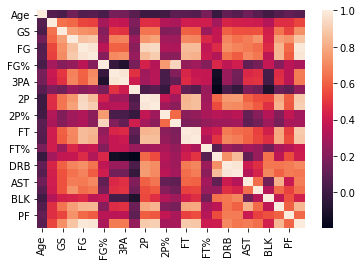

In [54]:
sns.heatmap(corr)

<AxesSubplot:>

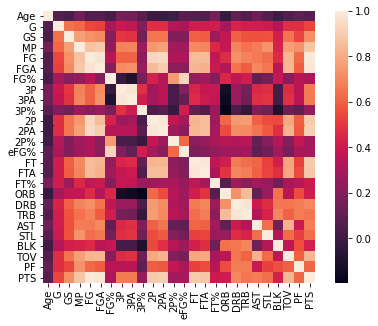

In [55]:
fig, ax = plt.subplots(figsize=(7,5))
sns.heatmap(corr, square=True)

### Diagonal correlation matrix

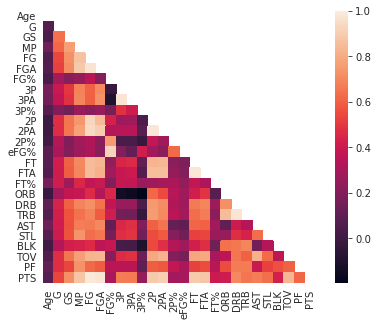

In [56]:
import numpy as np

mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(7, 5))
    ax = sns.heatmap(corr, mask=mask, vmax=1, square=True)

## Scatter Plot

In [57]:
df

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,Álex Abrines,SG,25,OKC,31,2,19.0,1.8,5.1,0.357,...,0.923,0.2,1.4,1.5,0.6,0.5,0.2,0.5,1.7,5.3
1,Quincy Acy,PF,28,PHO,10,0,12.3,0.4,1.8,0.222,...,0.700,0.3,2.2,2.5,0.8,0.1,0.4,0.4,2.4,1.7
2,Jaylen Adams,PG,22,ATL,34,1,12.6,1.1,3.2,0.345,...,0.778,0.3,1.4,1.8,1.9,0.4,0.1,0.8,1.3,3.2
3,Steven Adams,C,25,OKC,80,80,33.4,6.0,10.1,0.595,...,0.500,4.9,4.6,9.5,1.6,1.5,1.0,1.7,2.6,13.9
4,Bam Adebayo,C,21,MIA,82,28,23.3,3.4,5.9,0.576,...,0.735,2.0,5.3,7.3,2.2,0.9,0.8,1.5,2.5,8.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
703,Tyler Zeller,C,29,MEM,4,1,20.5,4.0,7.0,0.571,...,0.778,2.3,2.3,4.5,0.8,0.3,0.8,1.0,4.0,11.5
704,Ante Žižić,C,22,CLE,59,25,18.3,3.1,5.6,0.553,...,0.705,1.8,3.6,5.4,0.9,0.2,0.4,1.0,1.9,7.8
705,Ivica Zubac,C,21,TOT,59,37,17.6,3.6,6.4,0.559,...,0.802,1.9,4.2,6.1,1.1,0.2,0.9,1.2,2.3,8.9
706,Ivica Zubac,C,21,LAL,33,12,15.6,3.4,5.8,0.580,...,0.864,1.6,3.3,4.9,0.8,0.1,0.8,1.0,2.2,8.5


In [58]:
df.select_dtypes(include=['number'])

,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,25,31,2,19.0,1.8,5.1,0.357,1.3,4.1,0.323,...,0.923,0.2,1.4,1.5,0.6,0.5,0.2,0.5,1.7,5.3
1,28,10,0,12.3,0.4,1.8,0.222,0.2,1.5,0.133,...,0.700,0.3,2.2,2.5,0.8,0.1,0.4,0.4,2.4,1.7
2,22,34,1,12.6,1.1,3.2,0.345,0.7,2.2,0.338,...,0.778,0.3,1.4,1.8,1.9,0.4,0.1,0.8,1.3,3.2
3,25,80,80,33.4,6.0,10.1,0.595,0.0,0.0,0.000,...,0.500,4.9,4.6,9.5,1.6,1.5,1.0,1.7,2.6,13.9
4,21,82,28,23.3,3.4,5.9,0.576,0.0,0.2,0.200,...,0.735,2.0,5.3,7.3,2.2,0.9,0.8,1.5,2.5,8.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
703,29,4,1,20.5,4.0,7.0,0.571,0.0,0.0,0.000,...,0.778,2.3,2.3,4.5,0.8,0.3,0.8,1.0,4.0,11.5
704,22,59,25,18.3,3.1,5.6,0.553,0.0,0.0,0.000,...,0.705,1.8,3.6,5.4,0.9,0.2,0.4,1.0,1.9,7.8
705,21,59,37,17.6,3.6,6.4,0.559,0.0,0.0,0.000,...,0.802,1.9,4.2,6.1,1.1,0.2,0.9,1.2,2.3,8.9
706,21,33,12,15.6,3.4,5.8,0.580,0.0,0.0,0.000,...,0.864,1.6,3.3,4.9,0.8,0.1,0.8,1.0,2.2,8.5


In [59]:
number = df.select_dtypes(include=['number'])

In [60]:
number.iloc[:,:5]

,Age,G,GS,MP,FG
0,25,31,2,19.0,1.8
1,28,10,0,12.3,0.4
2,22,34,1,12.6,1.1
3,25,80,80,33.4,6.0
4,21,82,28,23.3,3.4
...,...,...,...,...,...
703,29,4,1,20.5,4.0
704,22,59,25,18.3,3.1
705,21,59,37,17.6,3.6
706,21,33,12,15.6,3.4


In [61]:
selections = ['Age', 'G', 'STL', 'AST', 'PTS']
df5 = df[selections]
df5

,Age,G,STL,AST,PTS
0,25,31,0.5,0.6,5.3
1,28,10,0.1,0.8,1.7
2,22,34,0.4,1.9,3.2
3,25,80,1.5,1.6,13.9
4,21,82,0.9,2.2,8.9
...,...,...,...,...,...
703,29,4,0.3,0.8,11.5
704,22,59,0.2,0.9,7.8
705,21,59,0.2,1.1,8.9
706,21,33,0.1,0.8,8.5


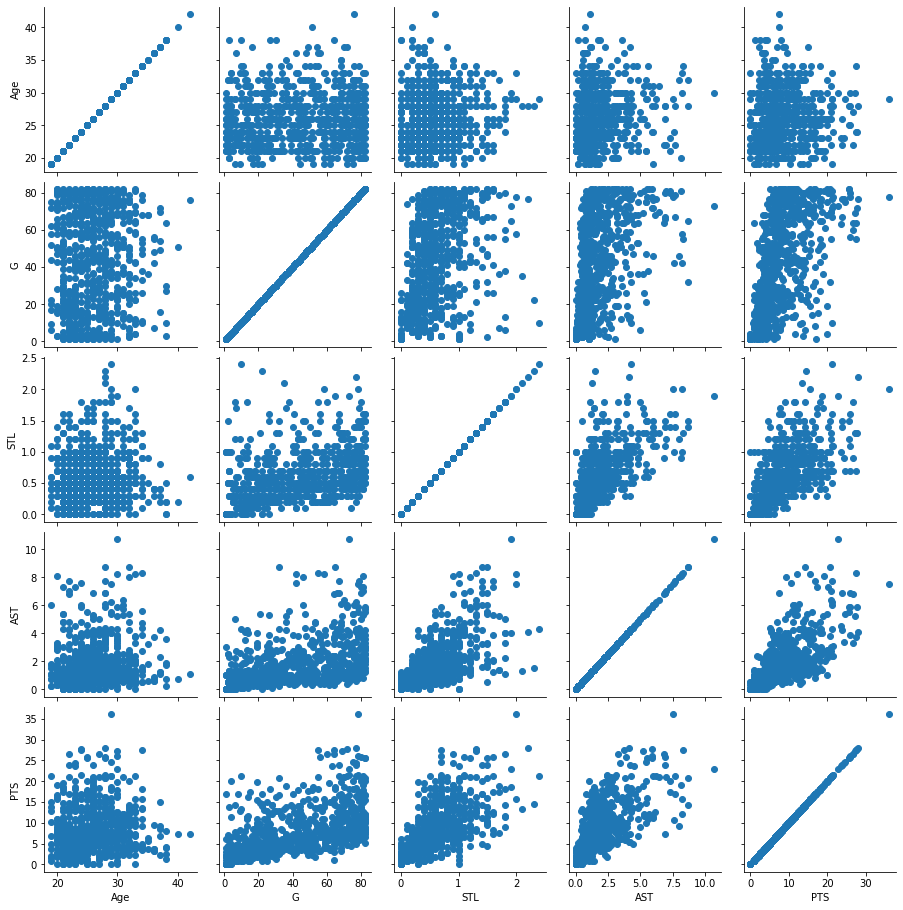

In [62]:
g = sns.PairGrid(df5)
g.map(plt.scatter);

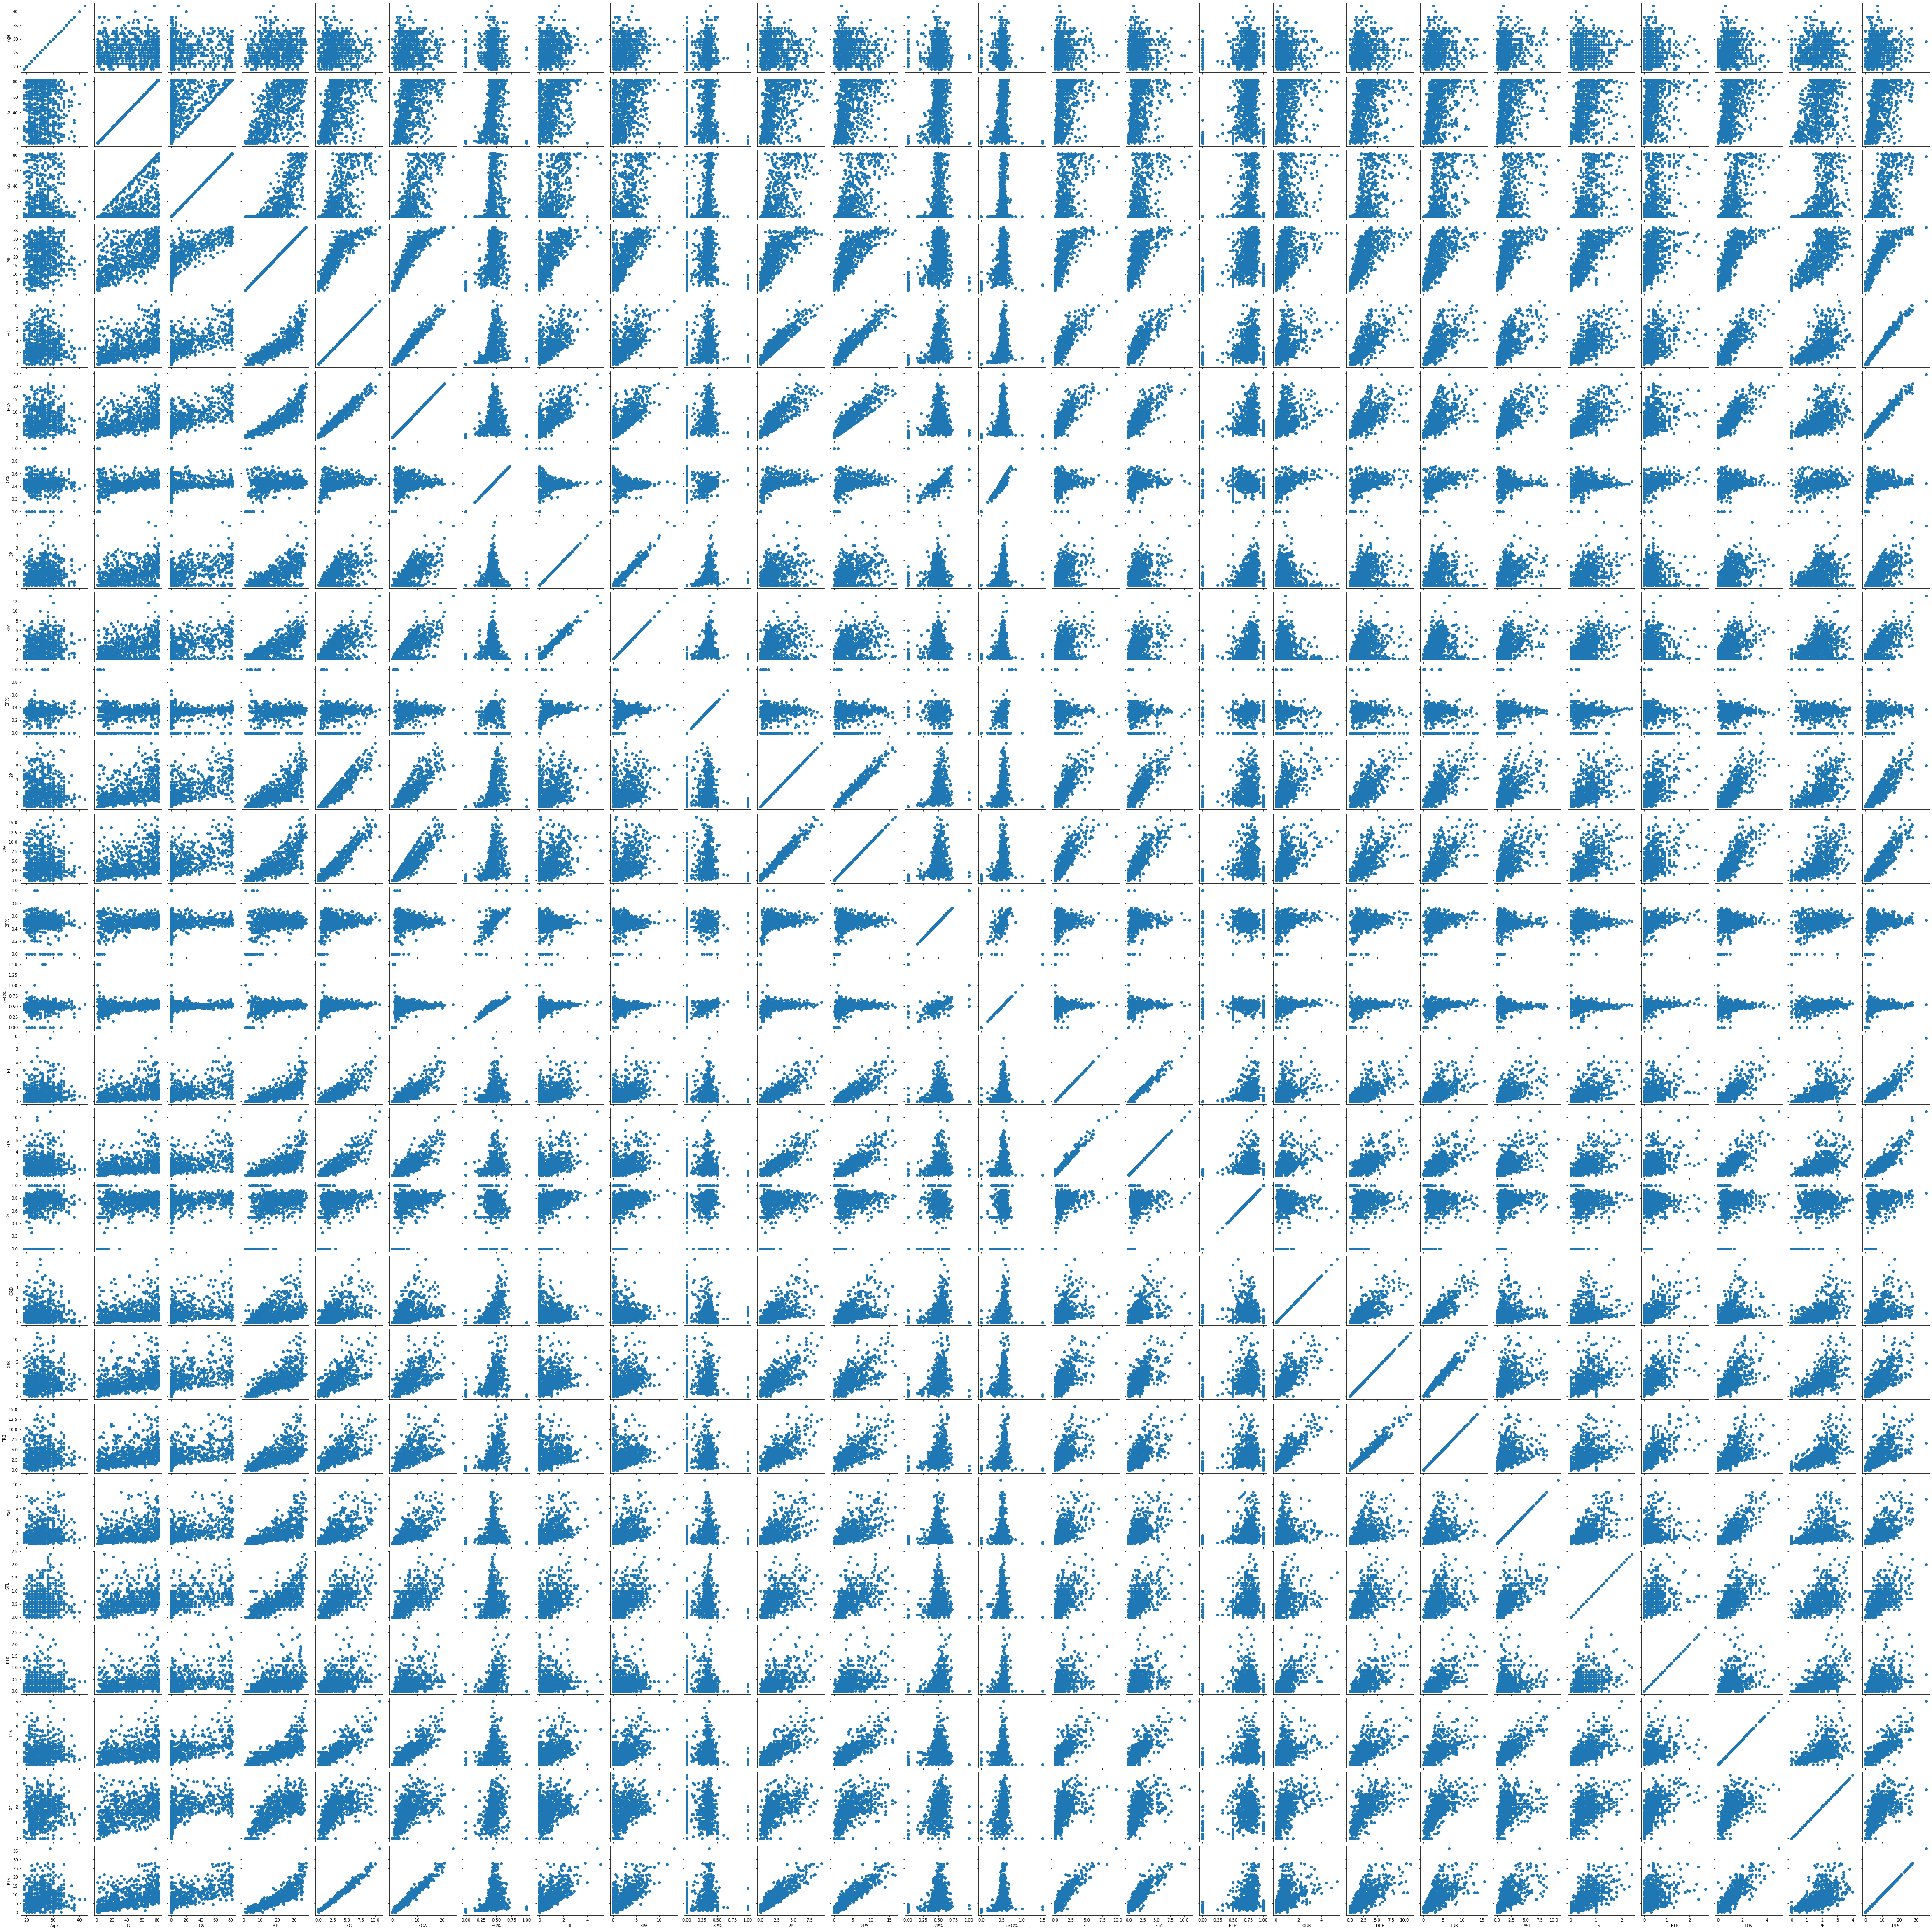

In [63]:
g = sns.PairGrid(number)
g.map(plt.scatter);